# Steps

## Open https://makersuite.google.com/

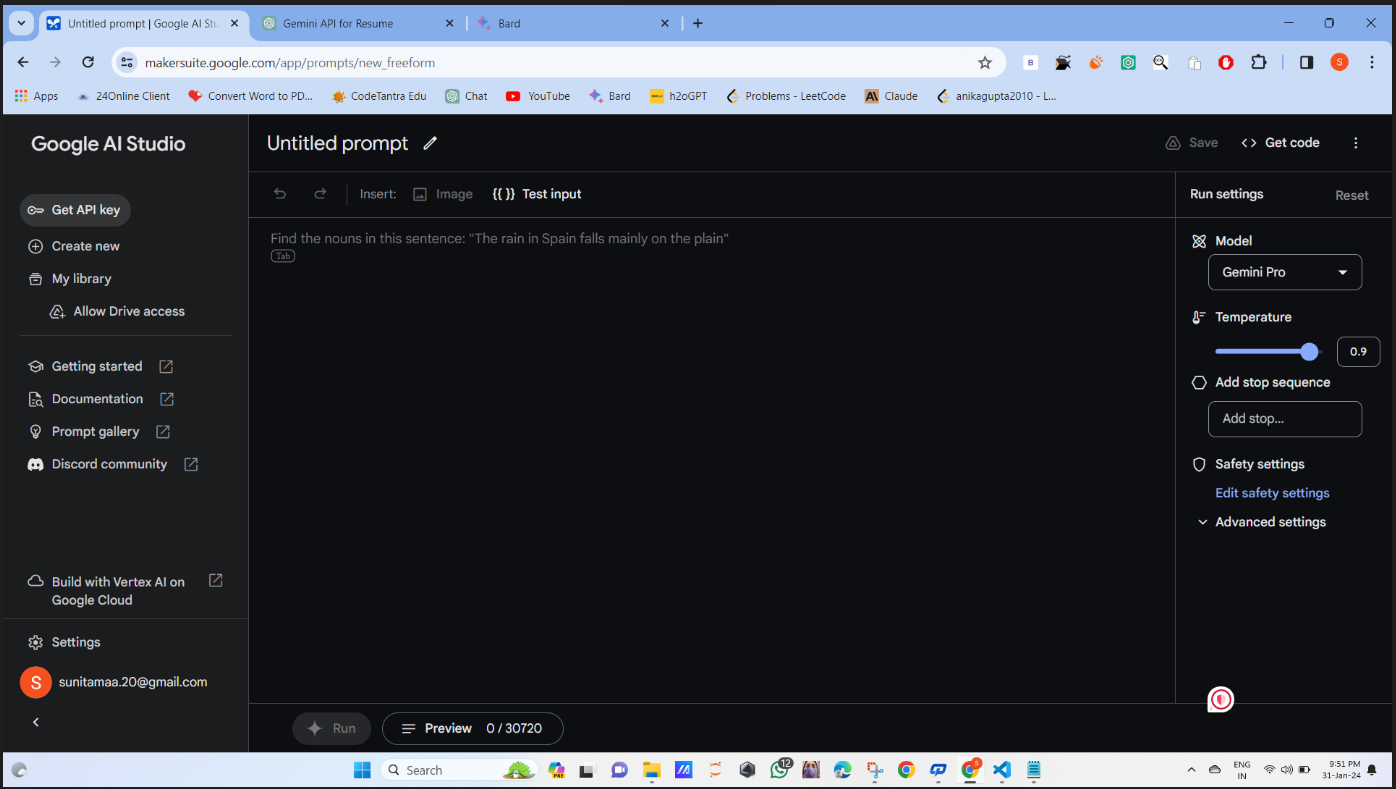

## Press 'Get API Key'

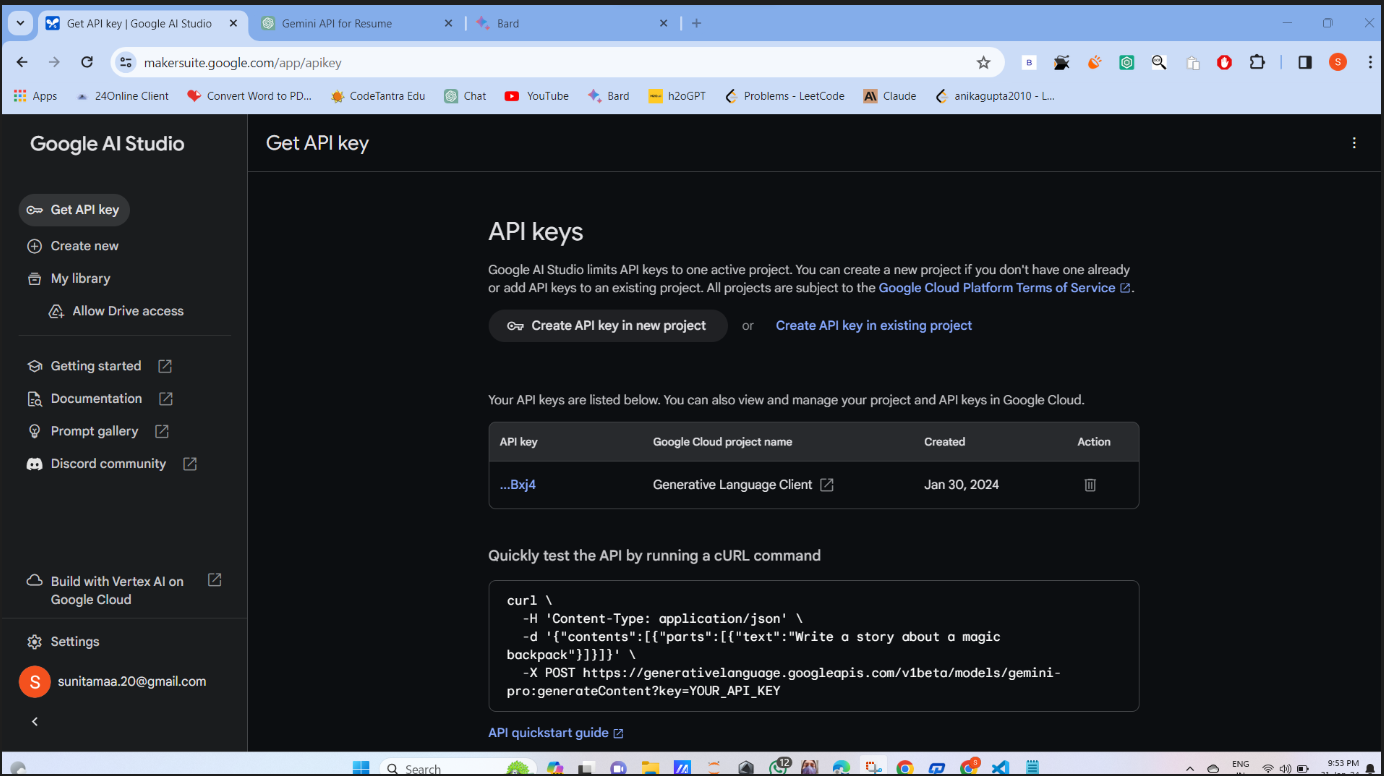

## Copy the api_key

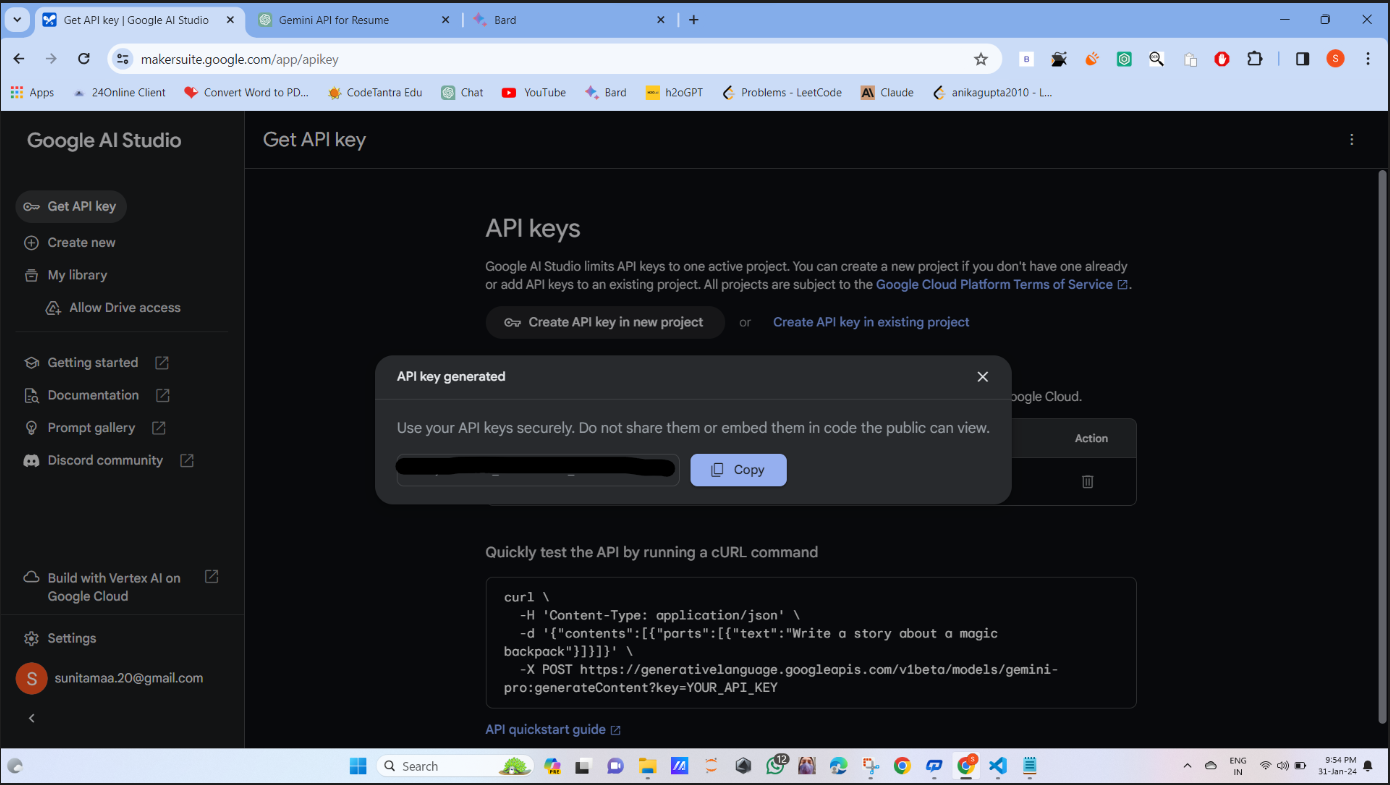

# For tesseract .exe file use
https://github.com/UB-Mannheim/tesseract/wiki

# *** Actual CODE is Below***

In [ ]:
import google.generativeai as genai
from pathlib import Path

In [4]:
! pip install pytesseract
! pip install pdf2image
! apt-get install poppler-utils
! apt-get install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 32 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.3 [186 kB]
Fetched 186 kB in 0s (424 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 121730 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.3_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.3) ...
Setting up poppler-utils (22.02.0-2ubuntu0.3) ...
Processing triggers for man-db (2.10.2-1) ...
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
T

# PDF to text file

In [ ]:
import io
import pytesseract
from pdf2image import convert_from_path

def extract_text_from_pdf(pdf_path):
    # Convert PDF to image
    pages = convert_from_path(pdf_path, 500)

    # Extract text from each page using Tesseract OCR
    text_data = ''
    for page in pages:
        text = pytesseract.image_to_string(page)
        text_data += text + '\n'

    # Return the text data
    return text_data

text = extract_text_from_pdf('sample.pdf')
print(text)

AKSHAT JAIN

EXPERIENCE

StuValley Technology, Remote — AI/ML with Backend Development

January 2024 — Present

e Creating a NER-based model to extract relevant features from resumes and predict the results
based on job descriptions.

e Implementing Hugging Face API models to fasten the performance.

LanguifyAI, Remote — Project Intern
July 2023 — August 2023

e Developed a Vision Transformer (ViT) model for image classification on the CIFAR-10
dataset, delivering an impressive accuracy rate exceeding 90%.

e Earned a perfect 10/10 performance rating and received recognition for outstanding
accomplishments.

EDUCATION

Bennett University, Gr. Noida — B-Tech CSE
September 2021 - May 2025
CGPA: 9.71/10

Coursework: Data Structures, Design and Analysis of Algorithms, Operating Systems, Information
Management Systems, Computer Networks, Software Engineering, Engineering Calculus, Linear

Algebra & Ordinary Differential Equations.

PROJECTS

Skin Disease Classification

https://github.com/A

# Text to text using Gemini


In [ ]:
import requests
import json

# Replace 'YOUR_API_KEY' with your actual API key
API_KEY = "YOUR_API_KEY"

url = f"https://generativelanguage.googleapis.com/v1/models/gemini-pro:generateContent?key={API_KEY}"

payload = {
    "contents": [
        {
            "role": "user",
            "parts": [{"text": '''Use the ner model in the resume extraction model such that it will obtain the json header
                       file as class name of  fields like Name, Email, Phone, Skills, Education, Experience?'''}]
        }
    ]
}

headers = {'Content-Type': 'application/json'}

response = requests.post(url, data=json.dumps(payload), headers=headers)

print(response.json())


{'candidates': [{'content': {'parts': [{'text': 'To utilize a Named Entity Recognition (NER) model in a resume extraction model to obtain a JSON header file with class names for fields like Name, Email, Phone, Skills, Education, and Experience, follow these steps:\n\n**1. Data Preparation:**\n\n- Gather a large and diverse dataset of resumes in various formats (PDF, Word, plain text, etc.).\n- Label the data with relevant entities and their corresponding classes, such as "Name," "Email," "Phone," "Skills," "Education," and "Experience."\n\n**2. Preprocessing:**\n\n- Clean the resumes by removing unnecessary formatting and noise.\n- Tokenize the text into individual words or n-grams.\n- Convert the tokens into lowercase and remove punctuation.\n\n**3. NER Model Training:**\n\n- Select an appropriate NER model architecture, such as BiLSTM-CRF or BERT-CRF.\n- Train the model on the labeled resume dataset using a suitable loss function and optimizer.\n- Tune the hyperparameters to optimize

In [ ]:
response = requests.post(url, data=json.dumps(payload), headers=headers)

response_text = json.dumps(response.json(), indent=2)

response_lines = response_text.split('\n')

with open('response.txt', 'w') as file:
    file.write(response_text)


# Image + Text to Text

In [ ]:
import base64

def image_to_base64(image_path):
    with open(image_path, "rb") as image_file:
        base64_encoded = base64.b64encode(image_file.read()).decode('utf-8')
    return base64_encoded

image_path = 'image_path'
base64_data = image_to_base64(image_path)

print(base64_data)


iVBORw0KGgoAAAANSUhEUgAAAowAAAB+CAYAAACu9kDtAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAADsMAAA7DAcdvqGQAAABhaVRYdFNuaXBNZXRhZGF0YQAAAAAAeyJjbGlwUG9pbnRzIjpbeyJ4IjowLCJ5IjowfSx7IngiOjY1MiwieSI6MH0seyJ4Ijo2NTIsInkiOjEyNn0seyJ4IjowLCJ5IjoxMjZ9XX1haineAAAv3klEQVR4Xu2dTWscR9f3z/VwfwNBJBLjyMZgMGhjLaIoJMTOSggG5FWYa6XFLEwioxgEiWwQglhZCBLFMhgyC/MsMk9WMhlQtMoLMVG8iLKwuAUC48jBdmQTfQY9p966q6q7q19mNJLs/w/amu6prjp16lT1qTrV4//sMwQAAAAAAEAG/0f/BQAAAAAAIBU4jAAAAAAAIAgcRgAAAAAAEAQOIwAAAAAACAKHEQAAAAAABIHDCAAAAAAAgsBhBAAAAAAAQeAwAgAAAACAIHAYAQAAAABAEDiMAAAAAAAgCBxGAAAAAAAQBA4jAAAAAAAIAocRAAAAAAAEgcMIAAAAAACC9NxhbH98iUYuho+rd59zyk26GX0GiiOsk901usqy3dzQ511ic4lt4uM12tPnxx/Vht3S097dzw5cP7KMi02W/PDoRT0PCmnDS7b2nqtx0LnWKTrPTB0d9tjRo/I3monnSXx8Ru1dna5nqHqnyxMf3R43yyJtVMjyUo21KUj7iO3AHdsOol++XPTcYazdWqH7P5njNs2eExfnrWsr9OVEv0oMAADgJWCIrvRwbK8v2s8Zc3xBtQGdoGeoescyzFOdr45O3baurdCVYZX6UGAnqtE+S7MtluXWGPXpy68CfRNfsP4b3EqgCAhJAwAAAK8oe38/4n9P06meO9PguHEMHMYXbhg7Zbk4Wk7XR97yflZ6tTzt3a9DrfFSvV62ju73whxmyXtD32en

In [ ]:
import base64
import requests
import json

def image_to_base64(image_path):
    with open(image_path, "rb") as image_file:
        base64_encoded = base64.b64encode(image_file.read()).decode('utf-8')
    return base64_encoded

image_path = 'image_path'
base64_data = image_to_base64(image_path)

API_KEY = "YOUR_API_KEY"

# Define the URL
url = f"https://generativelanguage.googleapis.com/v1/models/gemini-pro:generateContent?key={API_KEY}"

payload = {
    "contents": [
        {
            "role": "user",
            "parts": [
                {
                    "text": '''Extract the text from this image''',
                    "images": [base64_data]
                }
            ]
        }
    ]
}

headers = {'Content-Type': 'application/json'}

response = requests.post(url, data=json.dumps(payload), headers=headers)

formatted_response = json.dumps(response.json(), indent=2)
print(formatted_response)

with open('response.txt', 'w') as file:
    file.write(formatted_response)


{
  "error": {
    "code": 400,
    "message": "Invalid JSON payload received. Unknown name \"images\" at 'contents[0].parts[0]': Cannot find field.",
    "status": "INVALID_ARGUMENT",
    "details": [
      {
        "@type": "type.googleapis.com/google.rpc.BadRequest",
        "fieldViolations": [
          {
            "field": "contents[0].parts[0]",
            "description": "Invalid JSON payload received. Unknown name \"images\" at 'contents[0].parts[0]': Cannot find field."
          }
        ]
      }
    ]
  }
}


## Gemini not worked for text present on image

# Using pytesseract

In [ ]:
pip install pytesseract


Note: you may need to restart the kernel to use updated packages.


In [21]:
from PIL import Image
import pytesseract

pytesseract.pytesseract.tesseract_cmd = r'C:/Program Files/Tesseract-OCR/tesseract.exe'
image_path = 'image_path'

extracted_text = pytesseract.image_to_string(Image.open(image_path))

print("Extracted Text:")
print(extracted_text)



# **** Code STARTS here****

# PDF to text

In [5]:
import io
import pytesseract
from pdf2image import convert_from_path

def extract_text_from_pdf(pdf_path):
    pages = convert_from_path(pdf_path, 500)

    # Extract text from each page using Tesseract OCR
    text_data = ''
    for page in pages:
        text = pytesseract.image_to_string(page)
        text_data += text + '\n'

    return text_data

extracted_text = extract_text_from_pdf('Akshat\Resumedataextraction_NER_Bert\Dataset\DIKESH RAY.pdf')
# print(text)

In [6]:
with open('resume.txt', 'w') as file:
    file.write(extracted_text)

# Extraction of features

In [18]:
with open('resume.txt', 'r') as file:
    extracted_text = file.read()

In [29]:
# Replace 'YOUR_API_KEY' with your actual API key
genai.api_key = 'YOUR_API_KEY'

# Use the generative model 'gemini-pro' for extraction
model = genai.GenerativeModel('gemini-pro')

def process_text_file_and_generate(prompt, file_path):
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            file_content = file.read()

            generated_content = model.generate_content(prompt + "\n" + file_content)
            print("Generated Content:", generated_content.text)

    except FileNotFoundError:
        print(f"File not found: {file_path}")
    except Exception as e:
        print(f"Error processing the file: {e}")

In [30]:
file_path = 'resume.txt'
prompt = "What are the skills present in resume"

process_text_file_and_generate(prompt, file_path)


Generated Content: - C#
- ASP.Net
- ADO.Net
- WCF
- MVC
- Web Services
- JQuery
- Ajax
- AngularJS
- Ms Azure
- SQL Server
- HTML
- CSS
- Javascript
- JSON
- REACT js


# Merge multiple prompt results into a json file

In [36]:
prompts = {
    "Name": "What is the name present in resume",
    "Email": "What is the email present in resume",
    "Phone No": "What is the mobile no present in resume",
    "Education": "What are the educational qualifications present in resume? Answer in points and keep it precise.",
    "Skills": "What are the skills present in resume? Answer in points",
    "Work Experience": "What is/are the work experience present in resume?  Answer in points and keep it precise."
}


In [37]:
generated_content_dict = {}

def process_text_file_and_generate(prompt, file_path):
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            file_content = file.read()

            generated_content = model.generate_content(prompt + "\n" + file_content)
            return generated_content.text

    except FileNotFoundError:
        print(f"File not found: {file_path}")
        return None
    except Exception as e:
        print(f"Error processing the file: {e}")
        return None

for key, prompt in prompts.items():
    generated_content = process_text_file_and_generate(prompt, file_path)

    generated_content_dict[key] = generated_content

for key, value in generated_content_dict.items():
    print(f"{key}: {value}")

Name: Dikesh Ray
Email: Dikesh.ray@gmail.com
Phone No: 7827137507
Education: - MCA from UPTU with 70%.
- BCA from JAMIA HAMDARD University with 71%, New delhi.
- 10+2 from Bihar intermediate examination council, Patna.
- 10th from Bihar school examination board, Patna.
Skills: Skills present in resume:

* Programming Languages: C#, Java Script, HTML
* Web Technologies: ASP.Net, WCF, JQuery, Json, Ajax, AngularJS, MVC, Ms Azure
* Databases: SQL Server
* IDE Tools: Visual Studio
* Strong analytical and leadership skills
* Problem-solving and decision-making skills
* Ability to learn new things
* Team player
Work Experience: - Working with BLS international Services Itd. as a Software Developer from 05th June 2017 to till date.
- Working with BRAWN SOFTECH as a Software Developer from 20th September 2016 to 31st March 2017.
- Working with HYBEC IT SOLUTIONS LIMITED as a Software Developer from 01st June 2015 to 31st August 2016.
- Six months Industrial Training in Microsoft .Net at Swarni

In [1]:
import json
with open('extracted_features.json', 'w') as f:
    json.dump(generated_content_dict, f, indent=4)
print("Extraction completed. Extracted features saved in 'extracted_features.json'.")

Extraction completed. Extracted features saved in 'extracted_features.json'.


# Method-2 

# Image to Text

In [ ]:
# from PIL import Image
# import pytesseract

# pytesseract.pytesseract.tesseract_cmd = r'C:/Program Files/Tesseract-OCR/tesseract.exe'

# image_path1 = 'test_images/img7a.png'
# image_path2 = 'test_images/img7b.png'
# image_path3 = 'test_images/img7c.png'
# image_path4 = 'test_images/img7d.png'

# extracted_text1 = pytesseract.image_to_string(Image.open(image_path1))
# extracted_text2 = pytesseract.image_to_string(Image.open(image_path2))
# extracted_text3 = pytesseract.image_to_string(Image.open(image_path3))
# extracted_text4 = pytesseract.image_to_string(Image.open(image_path4))


In [31]:
# extracted_text = extracted_text1 + extracted_text2 + extracted_text3 + extracted_text4
# # extracted_text = extracted_text.split('\n')
# print(extracted_text)
# with open('resume.txt', 'w') as file:
#     file.write(extracted_text)

In [32]:
# import requests
# import json

# # Replace 'YOUR_API_KEY' with your actual API key
# API_KEY = "YOUR_API_KEY"

# url = f"https://generativelanguage.googleapis.com/v1/models/gemini-pro:generateContent?key={API_KEY}"

# response_file_path = 'path_file'

# with open(response_file_path, 'r') as file:
#     resume_text = file.read()

# payload = {
#     "contents": [
#         {
#             "role": "user",
#             "parts": [{"text": resume_text}]
#         }
#     ]
# }

# headers = {'Content-Type': 'application/json'}

# response = requests.post(url, data=json.dumps(payload), headers=headers)

# formatted_response = json.dumps(response.json(), indent=2)
# print(formatted_response)



# Using REGEX

In [ ]:
# import re
# import json

# with open('resume.txt', 'r') as file:
#     response_text = file.read()

# pattern = r'(?i)(Name|Email|Phone|Skills|Education|Experience)[:\s]+([^\n]+)'

# matches = re.findall(pattern, response_text)

# extracted_features = {}

# for match in matches:
#     key = match[0].strip()
#     value = match[1].strip()
#     extracted_features[key] = value

# with open('extracted_features.json', 'w') as json_file:
#     json.dump(extracted_features, json_file, indent=2)

# print("Extraction completed. Extracted features saved in 'extracted_features.json'.")


Extraction completed. Extracted features saved in 'extracted_features.json'.
